In [115]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [99]:
# Load the Basketball Dataset

data = pd.read_csv(r"D:\LEARNING\Great Learning\PGP- AI ML\COURSES\APPLIED STATISTICS\PROJECT\DS - Part2 - Basketball.csv")

In [100]:
print(data.shape)
data.head()

(61, 13)


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


#### Data Cleaning

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [102]:
#Check for null values
data = data.replace('-',np.nan)

In [103]:
data.isna().sum()

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

In [104]:
data[data['Score'].isna()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
60,Team 61,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017~18,9


In [105]:
#Team 61 has missing values in most of the rows hence dropping the row
data = data.drop(60)

In [106]:
#Replace na values with 0
data = data.fillna(0)

In [107]:
#TeamLaunch Year
data['TeamLaunch'].head()

0        1929
1        1929
2        1929
3    1931to32
4        1929
Name: TeamLaunch, dtype: object

In [108]:
data['TeamLaunch'] = data['TeamLaunch'].astype(str).str[0:4]

In [109]:
data['TeamLaunch'].tail()

55    2016
56    2009
57    1956
58    1951
59    1955
Name: TeamLaunch, dtype: object

In [110]:
#Convert data types to integer
cols = data.columns[data.dtypes.eq('object')]
cols = cols[1:10]
cols

Index(['Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames',
       'BasketScored', 'BasketGiven', 'TournamentChampion', 'Runner-up'],
      dtype='object')

In [111]:
data[cols] = data[cols].astype(int)

In [112]:
data.dtypes

Team                   object
Tournament              int64
Score                   int32
PlayedGames             int32
WonGames                int32
DrawnGames              int32
LostGames               int32
BasketScored            int32
BasketGiven             int32
TournamentChampion      int32
Runner-up               int32
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

### EDA

In [113]:
data.describe(include="all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60,60.000000
unique,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,NaN
top,Team 38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
mean,NaN,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,NaN,7.050000
std,NaN,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,NaN,5.315232
min,NaN,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,NaN,1.000000
25%,NaN,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,NaN,3.000000
50%,NaN,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,NaN,6.000000
75%,NaN,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,NaN,10.000000


array([[<AxesSubplot:title={'center':'Tournament'}>,
        <AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'PlayedGames'}>],
       [<AxesSubplot:title={'center':'WonGames'}>,
        <AxesSubplot:title={'center':'DrawnGames'}>,
        <AxesSubplot:title={'center':'LostGames'}>],
       [<AxesSubplot:title={'center':'BasketScored'}>,
        <AxesSubplot:title={'center':'BasketGiven'}>,
        <AxesSubplot:title={'center':'TournamentChampion'}>],
       [<AxesSubplot:title={'center':'Runner-up'}>,
        <AxesSubplot:title={'center':'HighestPositionHeld'}>,
        <AxesSubplot:>]], dtype=object)

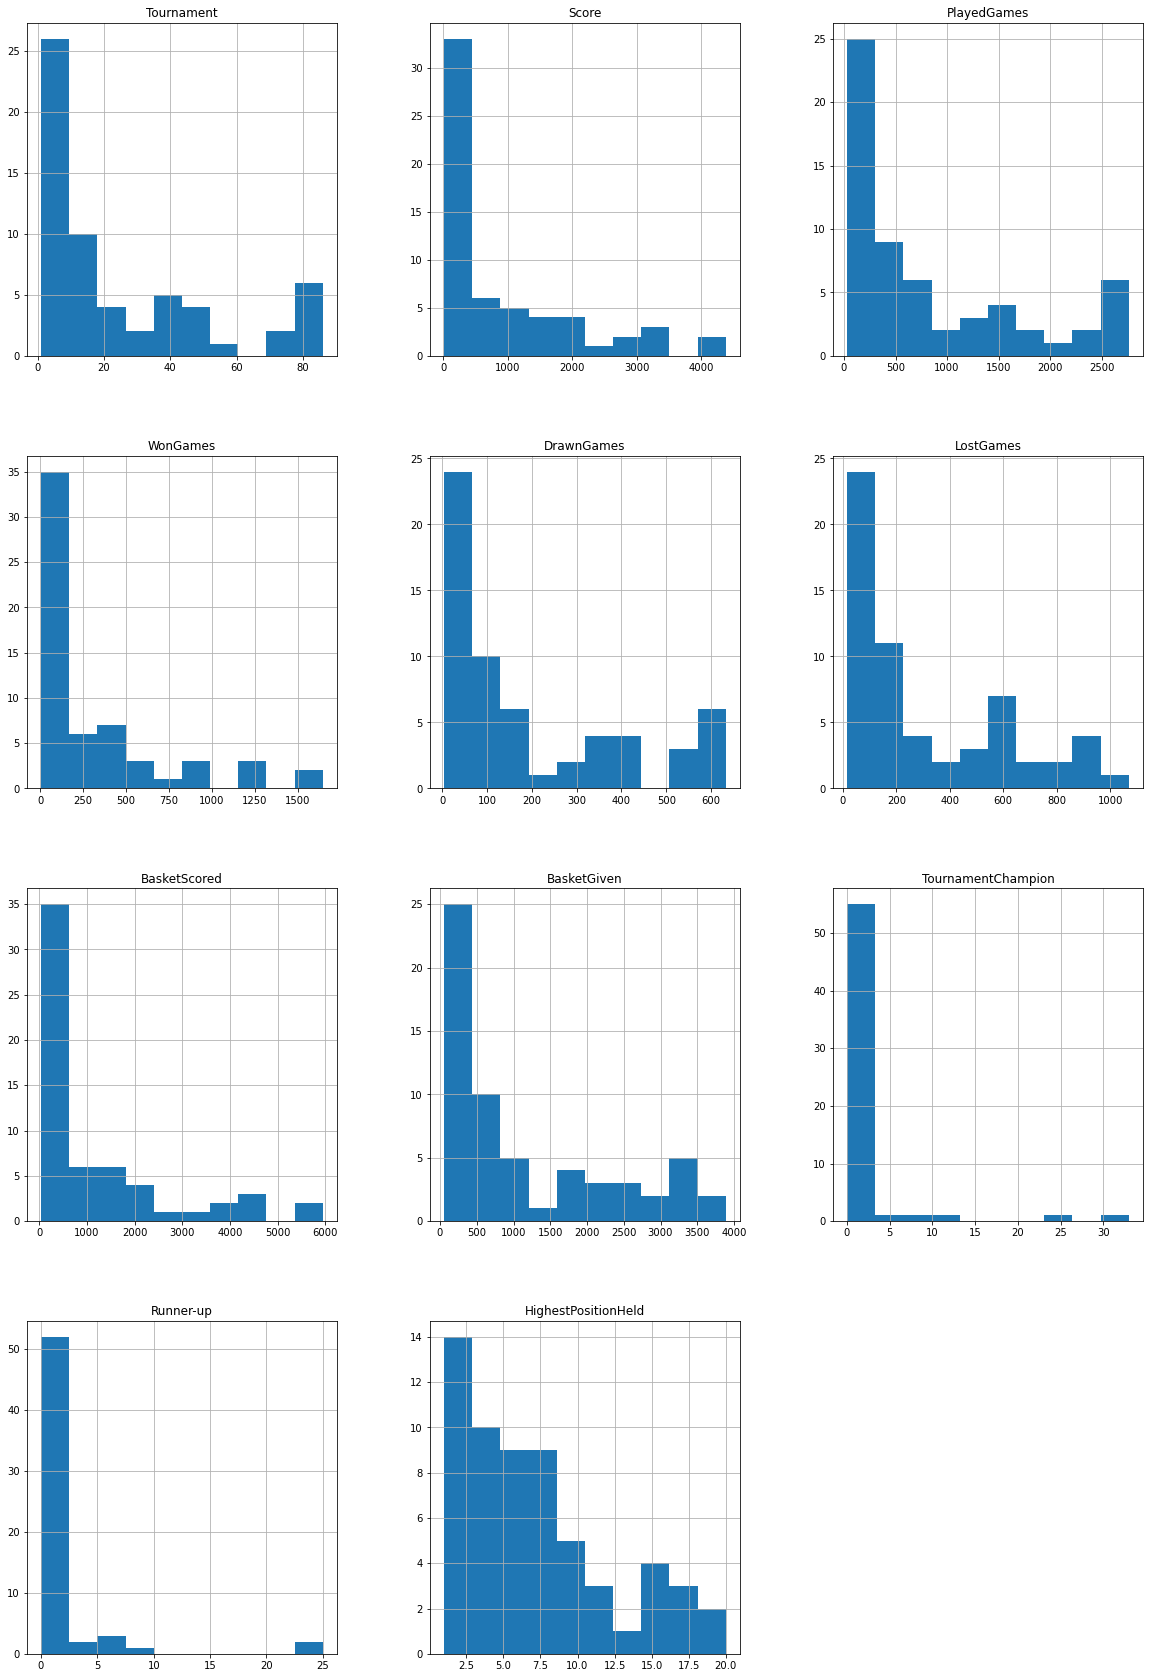

In [114]:
data.hist(figsize=(20,30))

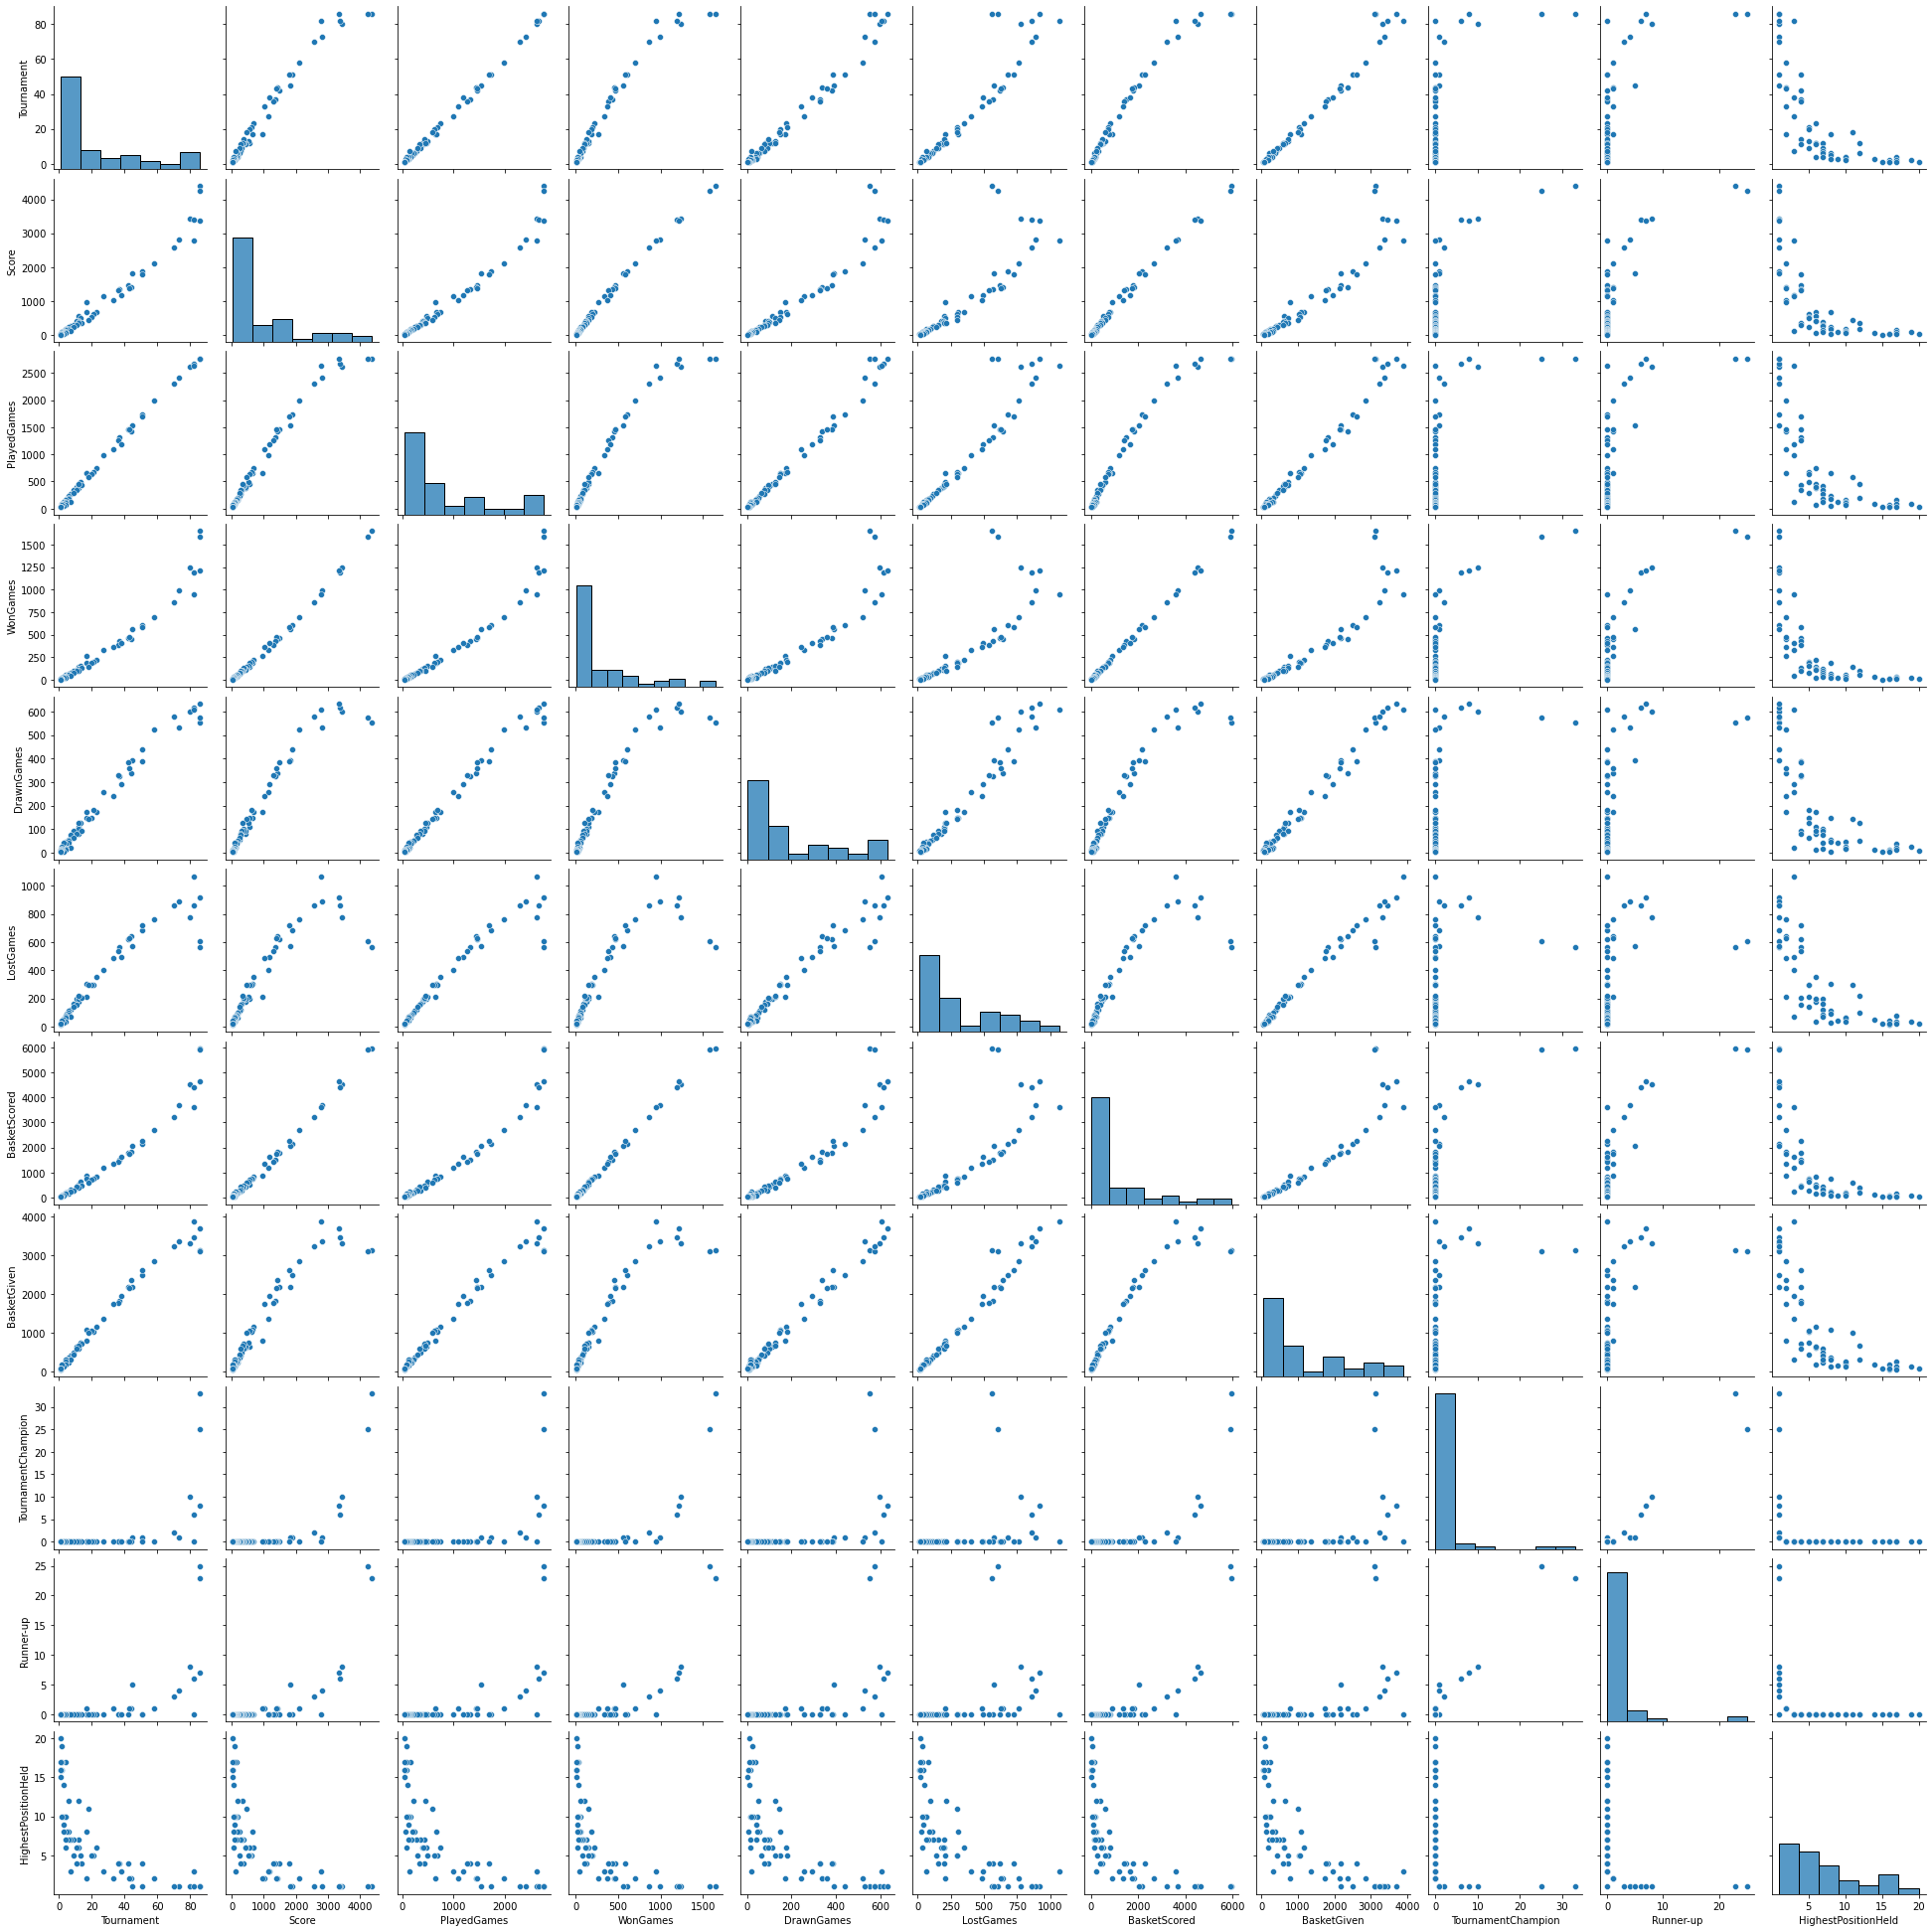

In [117]:
sns.pairplot(data)

<AxesSubplot:>

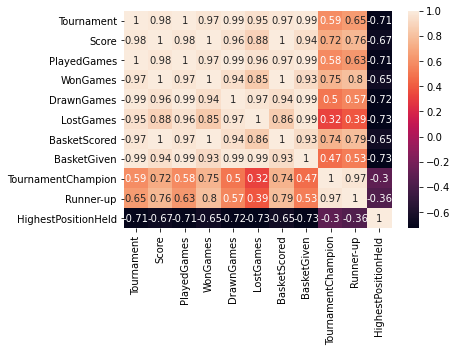

In [118]:
corr = data.corr()
sns.heatmap(corr, annot=True)

There is a negative correlation between Hoghest position held with tournaments and Games played. 
Which means the team which plays the most no of games get the least no in positions That means the highest rank.
Which tells us that the more the experience in games the the more is the chance of helding the high positions.

In [119]:
#Driving new columns for analysis

In [152]:
data['Percentage win'] = data['WonGames']*100/data['PlayedGames']
data['Percentage Drawn'] = data['DrawnGames']*100/data['PlayedGames']
data['Percentage Lost'] = data['LostGames']*100/data['PlayedGames']
data['Avg basket scored'] = data['BasketScored']/data['PlayedGames']
data['Avg basket given'] = data['BasketGiven']/data['PlayedGames']

In [123]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Percentage win,Percentage Drawn,Percentage Lost,Avg basket scored,Avg basket given
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596307,0.199855,0.203838,2.153150,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,0.572411,0.207458,0.220130,2.136133,1.127444
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,0.474751,0.228768,0.296480,1.734507,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,0.445571,0.231231,0.323198,1.650901,1.302177
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,0.437726,0.229182,0.333092,1.676684,1.339609


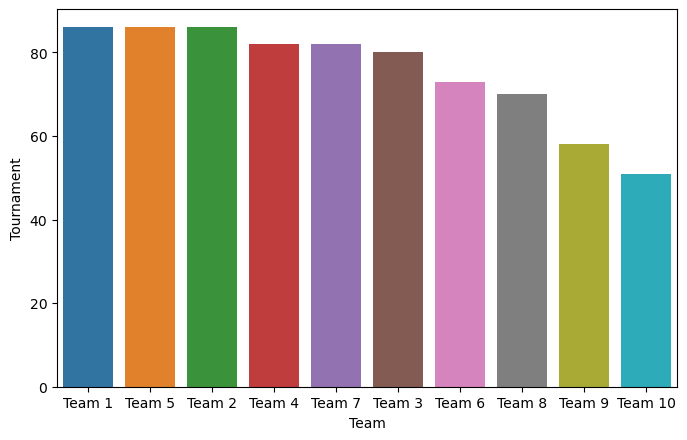

In [143]:
plt.figure(figsize=(8, 5), dpi=100) 
x = data.sort_values('Tournament',ascending=False)[['Team','Tournament']].head(10)
sns.barplot(x = 'Team',
            y = 'Tournament',
            data = x)
# Show the plot
plt.show()

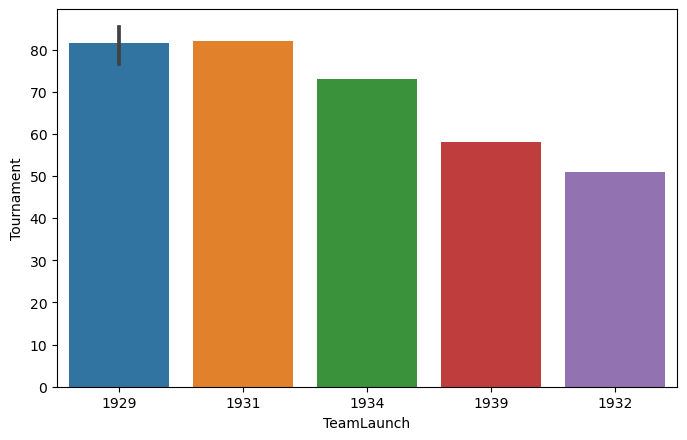

In [147]:
plt.figure(figsize=(8, 5), dpi=100) 
x = data.sort_values('Tournament',ascending=False)[['Team','Tournament','TeamLaunch']].head(10)
sns.barplot(x = 'TeamLaunch',
            y = 'Tournament',
            data = x)
# Show the plot
plt.show()

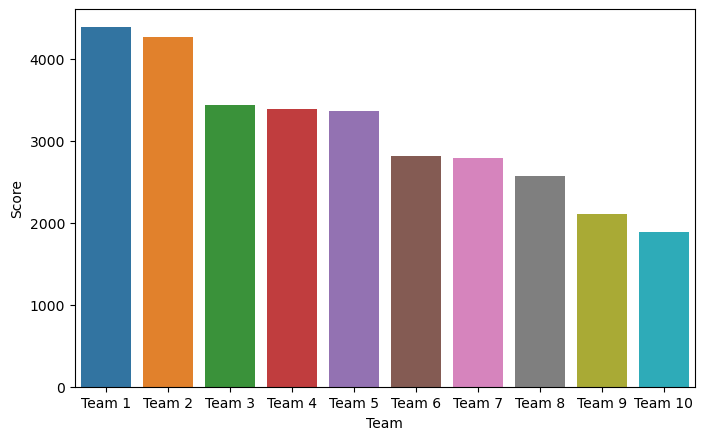

In [149]:
plt.figure(figsize=(8, 5), dpi=100) 
x = data.sort_values('Score',ascending=False)[['Team','Score','TeamLaunch']].head(10)
sns.barplot(x = 'Team',
            y = 'Score',
            data = x)
# Show the plot
plt.show()

#### High performing teams

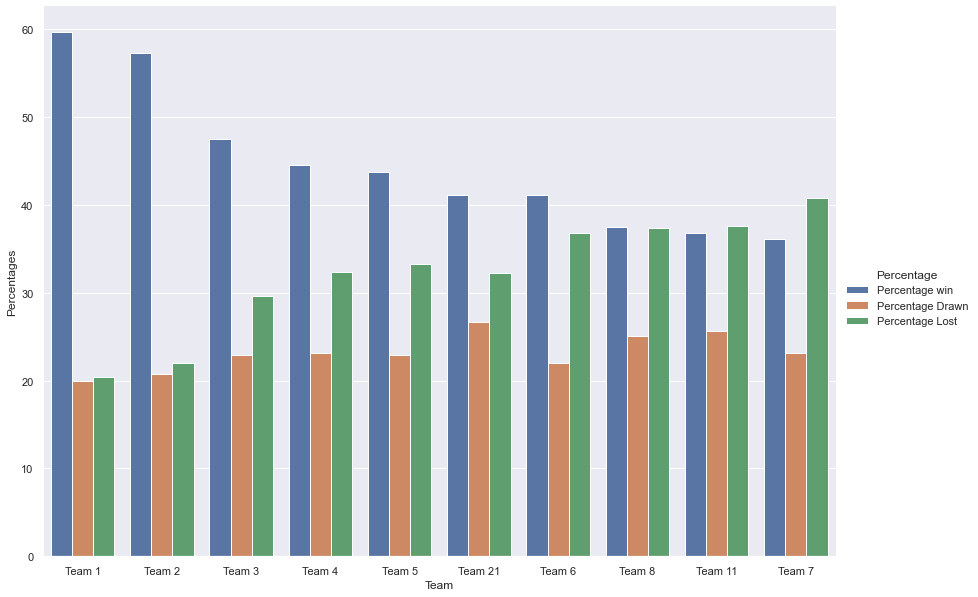

In [169]:
# Plotting
data1 = data.sort_values('Percentage win',ascending=False)[['Team','Percentage win','Percentage Drawn', 
                                                            'Percentage Lost']].head(10)
data1 = pd.melt(data1, id_vars="Team", var_name="Percentage", value_name="Percentages")
sns.catplot(x='Team', y='Percentages', hue='Percentage', data=data1, kind='bar',height=8.27, aspect=11.7/8.27)

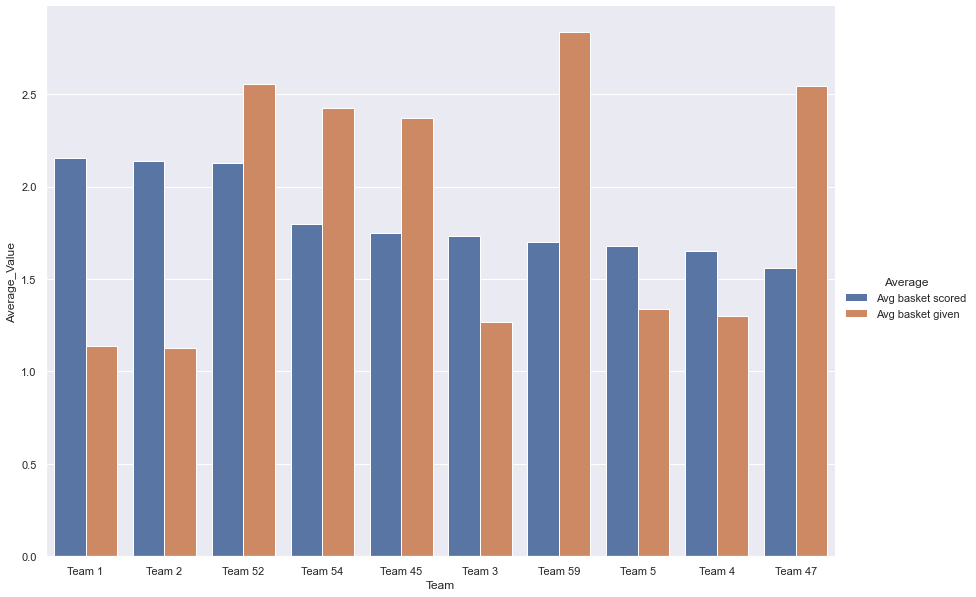

In [170]:
# Plotting
data1 = data.sort_values('Avg basket scored',ascending=False)[['Team','Avg basket scored','Avg basket given']].head(10)
data1 = pd.melt(data1, id_vars="Team", var_name="Average", value_name="Average_Value")
sns.catplot(x='Team', y='Average_Value', hue='Average', data=data1, kind='bar',height=8.27, aspect=11.7/8.27)

In [177]:
data1 = data.sort_values('TournamentChampion',ascending=False)[['Team','TournamentChampion','TeamLaunch']].head(10)
data1

,Team,TournamentChampion,TeamLaunch
0,Team 1,33,1929
1,Team 2,25,1929
2,Team 3,10,1929
4,Team 5,8,1929
3,Team 4,6,1931
7,Team 8,2,1929
9,Team 10,1,1932
10,Team 11,1,1941
5,Team 6,1,1934
37,Team 38,0,1962


In [178]:
data1 = data.sort_values('HighestPositionHeld',ascending=True)[['Team','HighestPositionHeld','TeamLaunch']].head(10)
data1

,Team,HighestPositionHeld,TeamLaunch
0,Team 1,1,1929
1,Team 2,1,1929
2,Team 3,1,1929
3,Team 4,1,1931
4,Team 5,1,1929
5,Team 6,1,1934
7,Team 8,1,1929
9,Team 10,1,1932
10,Team 11,1,1941
20,Team 21,2,1998


#### Low perfroming teams

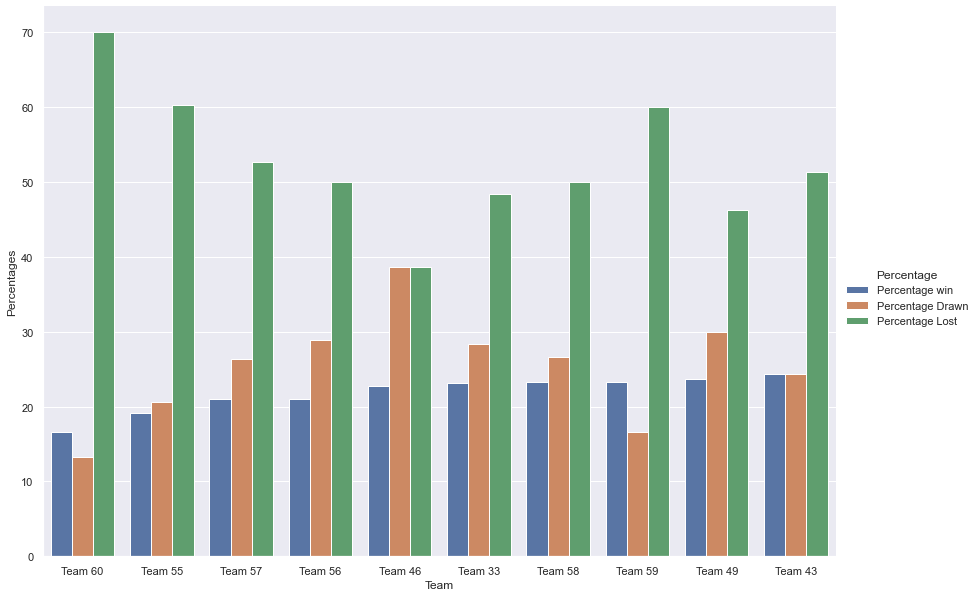

In [171]:
# Plotting
data1 = data.sort_values('Percentage win',ascending=True)[['Team','Percentage win','Percentage Drawn', 
                                                            'Percentage Lost']].head(10)
data1 = pd.melt(data1, id_vars="Team", var_name="Percentage", value_name="Percentages")
sns.catplot(x='Team', y='Percentages', hue='Percentage', data=data1, kind='bar',height=8.27, aspect=11.7/8.27)

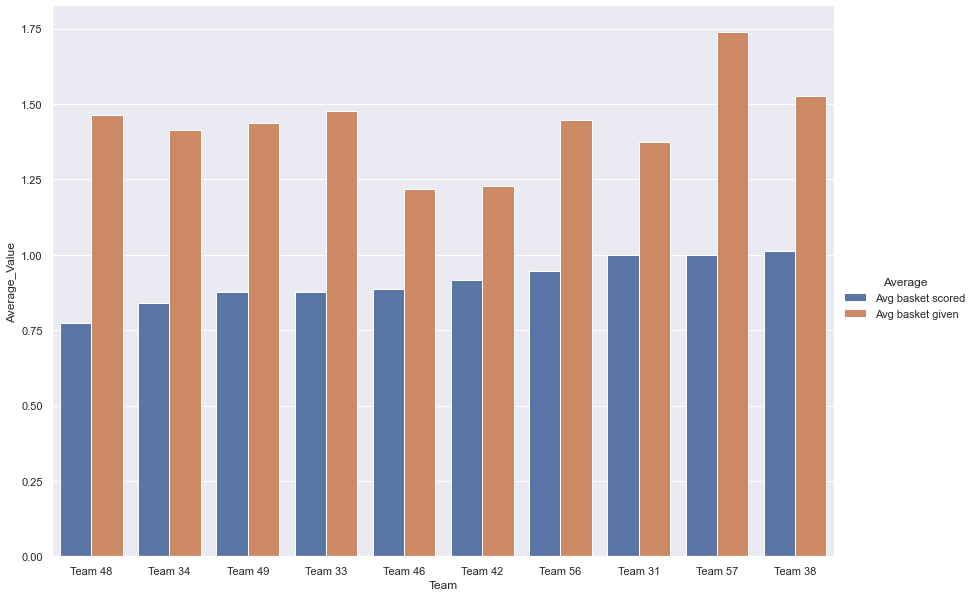

In [173]:
# Plotting
data1 = data.sort_values('Avg basket scored',ascending=True)[['Team','Avg basket scored','Avg basket given']].head(10)
data1 = pd.melt(data1, id_vars="Team", var_name="Average", value_name="Average_Value")
sns.catplot(x='Team', y='Average_Value', hue='Average', data=data1, kind='bar',height=8.27, aspect=11.7/8.27)

In [179]:
data1 = data.sort_values('HighestPositionHeld',ascending=False)[['Team','HighestPositionHeld','TeamLaunch']].head(10)
data1

,Team,HighestPositionHeld,TeamLaunch
56,Team 57,20,2009
48,Team 49,19,1995
55,Team 56,17,2016
42,Team 43,17,1999
47,Team 48,17,1996
58,Team 59,16,1951
57,Team 58,16,1956
54,Team 55,16,1950
59,Team 60,15,1955
50,Team 51,14,1953


In [189]:
data['TeamLaunch'] = pd.to_datetime(data['TeamLaunch'],format='%Y').dt.strftime('%Y')

In [192]:
data.sort_values('TeamLaunch',ascending=True)[['Team','TeamLaunch','Percentage win','Percentage Drawn', 'Percentage Lost', 'Avg basket scored',
       'Avg basket given','TournamentChampion','HighestPositionHeld']].head(10)

,Team,TeamLaunch,Percentage win,Percentage Drawn,Percentage Lost,Avg basket scored,Avg basket given,TournamentChampion,HighestPositionHeld
0,Team 1,1929,59.630702,19.985518,20.383780,2.153150,1.136857,33,1
51,Team 52,1929,29.166667,19.444444,51.388889,2.125000,2.555556,0,6
13,Team 14,1929,31.722689,23.529412,44.747899,1.290616,1.658263,0,2
7,Team 8,1929,37.532580,25.065161,37.402259,1.402259,1.403128,2,1
6,Team 7,1929,36.100533,23.153085,40.746382,1.374334,1.480960,0,3
44,Team 45,1929,33.076923,16.153846,50.769231,1.746154,2.369231,0,3
4,Team 5,1929,43.772629,22.918175,33.309196,1.676684,1.339609,8,1
2,Team 3,1929,47.475134,22.876817,29.648049,1.734507,1.265876,10,1
1,Team 2,1929,57.241130,20.745836,22.013034,2.136133,1.127444,25,1
53,Team 54,1929,33.333333,11.111111,55.555556,1.796296,2.425926,0,8


In [193]:
data.sort_values('TeamLaunch',ascending=False)[['Team','TeamLaunch','Percentage win','Percentage Drawn', 'Percentage Lost', 'Avg basket scored',
       'Avg basket given','TournamentChampion','HighestPositionHeld']].head(10)

,Team,TeamLaunch,Percentage win,Percentage Drawn,Percentage Lost,Avg basket scored,Avg basket given,TournamentChampion,HighestPositionHeld
55,Team 56,2016,21.052632,28.947368,50.000000,0.947368,1.447368,0,17
43,Team 44,2014,30.701754,23.684211,45.614035,1.219298,1.464912,0,10
56,Team 57,2009,21.052632,26.315789,52.631579,1.000000,1.736842,0,20
36,Team 37,2007,27.192982,24.561404,48.245614,1.070175,1.605263,0,8
24,Team 25,2004,32.236842,24.561404,43.201754,1.140351,1.388158,0,6
42,Team 43,1999,24.342105,24.342105,51.315789,1.019737,1.664474,0,17
20,Team 21,1998,41.176471,26.625387,32.198142,1.380805,1.221362,0,2
47,Team 48,1996,25.000000,28.750000,46.250000,0.775000,1.462500,0,17
48,Team 49,1995,23.750000,30.000000,46.250000,0.875000,1.437500,0,19
38,Team 39,1994,32.500000,28.125000,39.375000,1.243750,1.506250,0,10


In [190]:
data.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld', 'Percentage win',
       'Percentage Drawn', 'Percentage Lost', 'Avg basket scored',
       'Avg basket given'],
      dtype='object')

- Amoung the new teams Team 21 and Team 25 are doing good. 
Amoung the old teams Team1, Team 2, Team 3 ,Team 4, Team 5, Team 52, Team 54 are doing good.

- Low performing teams are Team 60,Team 55,Team 57, Team 48, Team 54,Team 49,Team 46

In [196]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = data['HighestPositionHeld']
x = data[['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'Percentage win',
       'Percentage Drawn', 'Percentage Lost', 'Avg basket scored',
       'Avg basket given']]

# Train the model using the training sets
regr.fit(x,y)



LinearRegression()

In [199]:
np.set_printoptions(suppress=True)
regr.coef_

array([ 0.07573609,  0.00395094, -0.00667743, -0.00711018, -0.00772728,
        0.00140122,  0.00807868, -0.00476586,  0.03299515, -0.30609263,
        0.05846737, -0.36166104,  0.15858384,  0.20204057, -4.40146397,
        4.09680151])

In [198]:
regr.intercept_

-110.30694567392983

Percentage win and Avg bascket scored are having high negative coeffcients.
The teams having highest percentage wins/Highest avg basket score are having low value of highestpositionheld or
we can say they are ranked highest( Lower the position value higher the Ranking). 

#### Suggestion

When I calculate dthe average no of basket score it was coming to a low value.  Ususally in a basket ball the average basket scored ranges from 75 - 115.

If we compare the Games playes vs basket scored this is coming to a very low value for basket scored.